<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix)

Here, in the reimplementation and subsequent parameter tuning fo the model, three runs have been tabulated and saved.

* The results generated for various version/schanges has informed the structure for simple-cg code, which is in cyc-gan directory in this instance.

#### Installation and dependencies check

In [3]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2216, done.
remote: Total 2216 (delta 0), reused 0 (delta 0), pack-reused 2216
Receiving objects: 100% (2216/2216), 8.03 MiB | 42.83 MiB/s, done.
Resolving deltas: 100% (1436/1436), done.


In [4]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [6]:
#!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [7]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

Specified [horse2zebra]
for details.

--2020-03-09 20:35:53--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘./datasets/horse2zebra.zip’

./datasets/horse2ze 100%[===================>] 111.45M  24.6MB/s    in 4.9s    

2020-03-09 20:35:59 (22.7 MB/s) - ‘./datasets/horse2zebra.zip’ saved [116867962/116867962]

Archive:  ./datasets/horse2zebra.zip
   creating: ./datasets/horse2zebra/trainA/
  inflating: ./datasets/horse2zebra/trainA/n02381460_6223.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1567.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3354.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_299.jpg  
  inflating: ./datasets/horse2zebra/tr

### Exploring horse 2 zebra data with the full architecture, reimplementing BAIR research paper.

* The prior implementations and tuned-models are saved in cyc-gan repo. The instance of those versions had latency issues and hence have been re-implemented here, with promising results.


* We download the official dataset and develop the model based on the scripts.

> Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [8]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2020-03-09 20:37:28--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  18.2MB/s    in 2.4s    

2020-03-09 20:37:31 (18.2 MB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



##### Why ls-gan:

* Normal GANs treat the 'D' as classifier with the sigmoid cross-entropy loss function. 

* This can lead to vanishing grad. problem during learning.

* This is overcome by ls-gan. It generates higher quality images and better stable during training.

### Training

* We observed the traiing for 50 epochs for initial runs and testing results, and eventually scaled to 200 epochs, and studied results by varying --netG, --norm, --gan_mode and other parameters.


* the hyper-params for optimizer have been varied and studied as well. ANother run with batch normalization adn a higher lr(rate) value has been submitted as well.

> For models with style-based trainign model & changed names: 
Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B 
and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.

* A CycleGAN repeats its training process, alternating between training the discriminators and the generators, for a specified number of training iterations.
> From BAIR: I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

In [9]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan
#--n_epochs 100 
#--gan_mode 'wgangp'
#--niter 100
#--gpu_ids 0,1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/horse2zebra        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

### Testing:


* --model test is usually used for generating results in one side. For the reconstruction results shown in ppt, we harness --model cycle_gan. 
* The results can be seen in the accompanying .html file & can be sene in the directory as well. 
> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.

* Most of the tuning and changes have been done to training and util helper files, and eventually abridged tothe simpler code being submitted.
* Altering the test-based architecture has been done in that version and documented in detail accordingly.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [10]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

#### Visualization and observations:
* The model struggles with matching colors, as we observe in Ukiyo-e style transfer model. 

* We observe this mainly in ukiyo and vangogh implementations. Even if there is change in tint of image, cyc-consistency loss won’t be affected & still is small.
- Hence, if we use a color-based loss term / weight consistency we see better results. 

* Pre-training or initialization of weights helps converge faster.

* This unsupervised approach also struggles with geometric changes, like changing the apparent size of individual object in an image (eg: seen in apple2orange ipynb), so it is best suited for stylistic transformations.

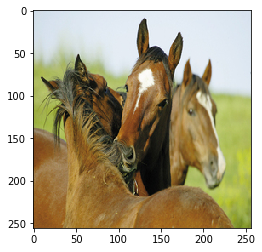

In [20]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_real.png')
plt.imshow(img)

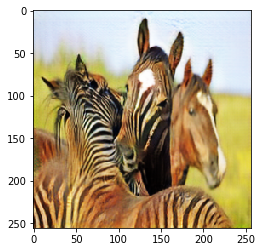

In [21]:
img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_fake.png')
plt.imshow(img)

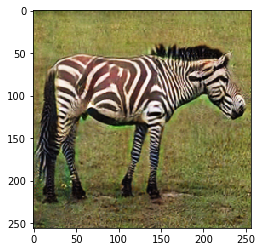

In [13]:
img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_3330_real.png')
plt.imshow(img)

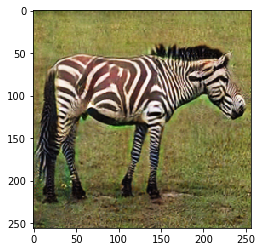

In [22]:
img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_3330_fake.png')
plt.imshow(img)

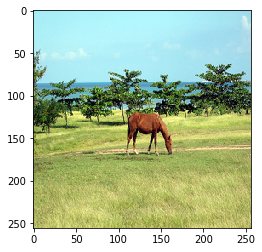

In [23]:
img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_2050_real.png')
plt.imshow(img)

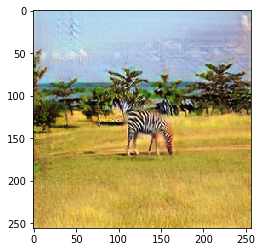

In [24]:
img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_2050_fake.png')
plt.imshow(img)